In [13]:
from sunpy.net.vso import VSOClient
import pytz
import os
from os import listdir
from os.path import isfile, join

from datetime import datetime
import sunpy.map
from sunpy.map import Map
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.colors import LogNorm
from astropy import units as u
# %matplotlib inline
client = VSOClient()

from astropy.io import fits
import astropy.units as u

Exception AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1929,    0]),), (array([1966, 1929]),),
       (array([1903, 3895]),), ..., (array([    1996, 11856583]),),
       (array([    1991, 11858579]),), (array([    1998, 11860570]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored
C:\Users\Akared\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


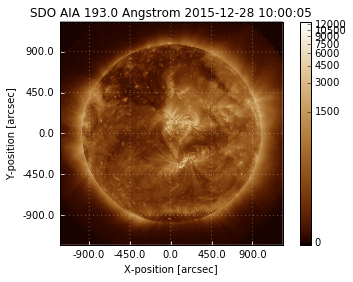

In [10]:
filename = "F:\\Research\\Data\\2016-03-26 14-28\\AIA_193\\aia_20151228_100005_0193_image_lev1.fits"
aia193 = Map(filename)   
aia193.peek()

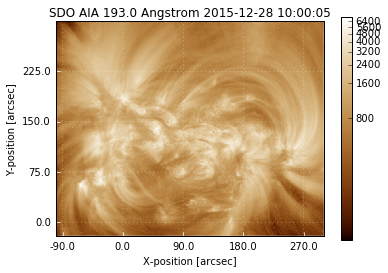

In [16]:
aia193_small = aia193.submap([-100.0,300.0]*u.arcsec, [300.0,-20.0]*u.arcsec) #([y range], [x range])
aia193_small.peek()

In [ ]:
#insert line

#Extracting data with astropy

In [7]:
image_data = fits.getdata(filename)
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(4096L, 4096L)


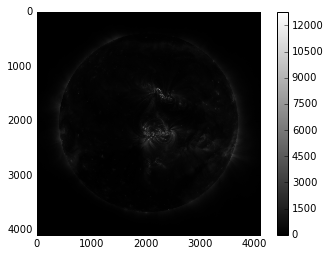

In [8]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

[<matplotlib.text.Text at 0xe6dd208>, <matplotlib.text.Text at 0xe728438>]

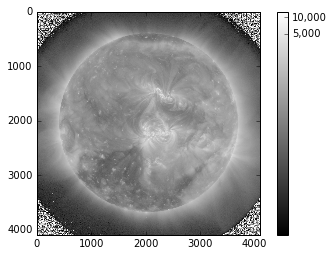

In [9]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])